### Importing Libraries 

In [91]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import random
import math
import matplotlib.pyplot as plt

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
import pandas as pd
data=pd.read_csv('../Data/AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [95]:
class Seq_Test:
   
  
    def computeBoundaries(alpha, beta):
       
        a=math.log(beta/(1-alpha))
        b=math.log((1 - beta)/alpha)
        return a, b

    def plotTest(self):
  
     def plotBoundaries(self, exposed):
            '''cumulative sums of exposed successes, bounded by the critical limits.
            '''


In [96]:
def conditionalSPRT(x,y,t1,alpha=0.05,beta=0.10,stop=None):
        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)

        def comb(n, k):
            return math.factorial(n) // math.factorial(k) // math.factorial(n - k)
        
        def lchoose(b, j):
            a=[]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                if len(j)<2:
                    j=j[0]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                for k in j:
                    n=b
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)
            else:
                n=b
                k=j
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)

            return np.array(a)

        def g(x,r,n,t1,t0=1):
            return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

        def h(x,r,n,t=1):
            return f(r,n,t,offset=ftermlog(x,r,n,t))

        def f(r,n,t,offset=0):
            upper=max(0,r-n)
            lower=min(n,r)
            rng=list(range(upper,lower+1))
            return np.sum(fterm(rng,r,n,t,offset))

        def fterm(j,r,n,t,offset=0):
            ftlog=ftermlog(j,r,n,t,offset)
            return np.array([math.exp(ex) for ex in ftlog])

        def ftermlog(j,r,n,t,offset=0):
            xx=r-j
            lch=lchoose(n,j)
            lchdiff=lchoose(n,xx)
            lg=np.array(j)*math.log(t)
            lgsum=lch+lchdiff
            lgsum2=lgsum+lg
            lgdiff=lgsum2-offset

            return lgdiff

        def logf(r,n,t,offset=0):

            z=f(r,n,t,offset)
            if z>0:
                return math.log(z)
            else:
                return np.nan

        def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
            offset=ftermlog(math.ceil(r/2),r,n,t1c)
            z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
            a=-math.log(alpha/(1-beta))
            b=math.log(beta/(1-alpha))
            lower=b
            upper=1+a
            return (np.array([lower,upper])+z)/math.log(t1c/t0)
            
        l=math.log(beta/(1-alpha))
        u=-math.log(alpha/(1-beta))
        sample_size=min(len(x),len(y))
        n=np.array(range(1,sample_size+1))

        if stop!=None:
            n=np.array([z for z in n if z<=stop])
        x1=np.cumsum(x[n-1])
        r=x1+np.cumsum(y[n-1])
        stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g

        clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
        limits=[]
        for v in clu:
            inArray=[]
            for vin in v:
                inArray.append(math.floor(vin))
            limits.append(np.array(inArray))
        limits=np.array(limits)

        k=np.where((stats>=u) | (stats<=l))
        cvalues=stats[k]
        if cvalues.shape[0]<1:
            k= np.nan
            outcome='Unable to conclude.Needs more sample.'
        else:
            k=np.min(k)
            if stats[k]>=u:
                outcome=f'Exposed group produced a statistically significant increase.'
            else:
                outcome='There is no statistically significant difference between two test groups'
        if (stop!=None) & (k==np.nan):
            c1=clowerUpper(r,stop,t1,alpha,beta)
            c1=math.floor(np.mean(c1)-0.5)
            if x1[n0]<=c1:
                truncate_decision='h0'
                outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
            else:
                truncate_decision='h1'
                outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
            truncated=stop
        else:
            truncate_decision='Non'
            truncated=np.nan
        return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)


In [97]:

def transform_data(df):
    
    exposed_group= data.loc[data.experiment == 'exposed']  #exposed set
    control_group= data.loc[data.experiment == 'control']  #control set


    exposed_group['dateHour'] = pd.to_datetime( exposed_group.date)
    exposed_group.dateHour += pd.to_timedelta( exposed_group.hour, unit='h')
    exposed_group.dateHour = exposed_group.dateHour.map(lambda x:  pd.Timestamp(x,tz=None).strftime('%Y-%m-%d:%H'))

    control_group['dateHour'] = pd.to_datetime( control_group.date)
    control_group.dateHour += pd.to_timedelta( control_group.hour, unit='h')
    control_group.dateHour =  control_group.dateHour.map(lambda x:  pd.Timestamp(x,tz=None).strftime('%Y-%m-%d:%H'))


    exposed_df=  exposed_group.groupby('dateHour').agg({'auction_id':'count', 'device_make':'count', 'platform_os':'count', 'browser':'count', 'yes':'sum', 'no':'sum'})
    control_df = control_group.groupby('dateHour').agg({'auction_id':'count', 'device_make':'count', 'platform_os':'count', 'browser':'count', 'yes':'sum', 'no':'sum'})


    exposed_df['engagement'] = exposed_df['yes'] + exposed_df['no']
    control_df['engagement'] = control_df['yes'] + control_df['no']
    exposed_df['success'] = exposed_df['yes'] 
    control_df['success'] = control_df['yes'] 



    expo_p = sum(exposed_df['success']) / sum(exposed_df['engagement'])
    cont_p = sum(control_df['success']) / sum(control_df['engagement'])


    expo_engagement = exposed_df['engagement'].to_numpy()
    cont_engagement = control_df['engagement'].to_numpy()

    exp = np.random.choice([0, 1], size=((np.sum(expo_engagement)),), p=[expo_p, 1-expo_p])
    cont = np.random.choice([0, 1], size=((np.sum(cont_engagement)),), p=[cont_p , 1-cont_p ])
    return exp,cont




In [102]:
class ConditionalSPRT:
    def __init__(self, x, y, odd_ratio, alpha=0.05, beta=0.1, stop=None):
        self.x = x
        self.y = y
        self.odd_ratio = odd_ratio
        self.alpha = alpha
        self.beta = beta
        self.stop = stop
    def plotExperiment(self, res):
        outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits = res
        lower_bound = limits[:, 0]
        upper_bound = limits[:,1]
        fig, ax = plt.subplots(figsize=(12,7))
        ax.plot(n, x1, label='Cumlative value of yes+no')
        ax.plot(n, lower_bound, label='Lower Bound', linestyle='--')
        ax.plot(n, upper_bound, label='Upper Bound', linestyle='--')
        plt.legend()
        plt.show()
    def run(self):
        res = conditionalSPRT(self.x, self.y, self.odd_ratio,
                              self.alpha, self.beta,
                              self.stop)
        return res


In [99]:

alpha = 0.05
beta = 0.1

st = Seq_Test
a, b = st.computeBoundaries(alpha = alpha, beta = beta)

##data processing here
exposed_group,control_group=transform_data(data)

# odd ratio
odd_ratio=(expo_p/(1-expo_p))/(cont_p /(1-cont_p ))

In [100]:
conditionalSPRTObj = ConditionalSPRT(exposed_group,control_group, odd_ratio, alpha, beta)
res = conditionalSPRTObj.run()

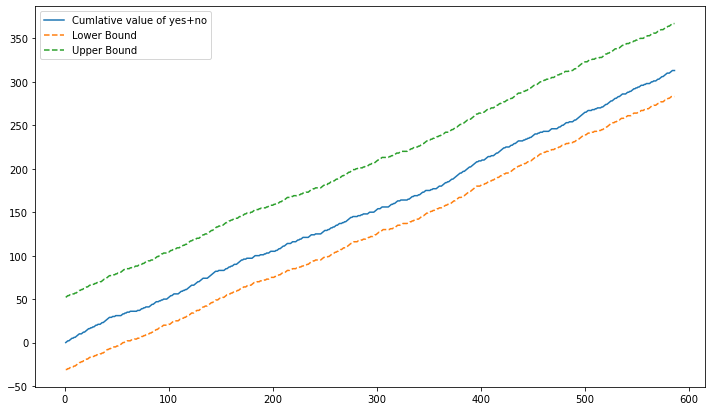

In [101]:
conditionalSPRTObj.plotExperiment(res)